<a href="https://colab.research.google.com/github/atvrai/NLP_Sentiment_Analysis_AviraApp/blob/main/NLP_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import copy , math

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import seaborn as sn
import nltk

In [8]:
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

ParserError: ignored

In [9]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
example = df['Text'][50]
print(example)
tokens = nltk.word_tokenize(example)
tokens[:10]

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
example = df['Text'][50]
print(example)
tokens = nltk.word_tokenize(example)
tokens[:10]

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [16]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [24]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [18]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [23]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [22]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [25]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [29]:
sia.polarity_scores('I am not so happy')

{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.5815}

In [30]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [31]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

# ***Vader Model***

In [32]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

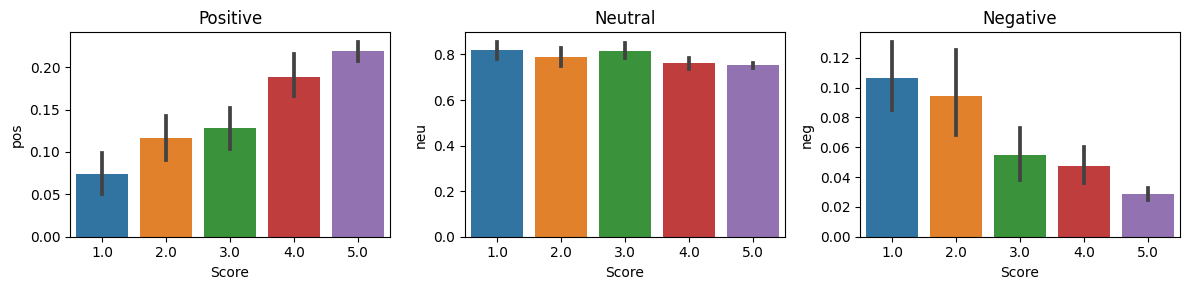

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sn.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sn.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sn.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# ***Roberta Model***

In [34]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s eta 0:00:00


In [35]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Downloading pre-Trained neural netwrok

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [39]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


Transformers Pipeline

In [40]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [41]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [42]:
data = pd.read_csv('review_extraction_55.csv')
data.tail()

,Review,Sentiment
667,Open,NaN
668,👍,NaN
669,👍,NaN
670,😊,NaN
671,😍😍😍,NaN


In [43]:
X_test = data['Review'].to_numpy()
X_test[:10]

array(['This app does not mess about. Very accurate and interface friendly. I am at a point that now I cannot do without this kind of interface integration to save 30 odd passwords I have. Any time I need to change a password or get a new one generated this does it seamlessly. Make this one stay please. All my fingers are thumbs up !!',
       "great when it works, but finicky and frustrating. edit: its finicky and frustrating because the password manager doesn't recognize a lot of fields where i need to put a password in or suggest a strong password and it wont save said strong password, so i have to go into the app instead of just signing in. the mobile version regularly just signs me out every thirty seconds sometimes.",
       "I would look somewhere else to store passwords. * passwords dont update across devices * i cant login in this app on android , it keeps saying there is no mobile data, which is absurd. I am also using wifi , same thing. * On the iPhone version, you can log i

In [44]:
Y_test = data['Sentiment'].to_numpy()
res_2 = {}

In [45]:
m = len(X_test)
m

672

In [46]:
sent_pipeline(X_test[32])

[{'label': 'NEGATIVE', 'score': 0.9992097616195679}]

In [47]:
s = []
for i in range(m):
  try:
    s.append(sent_pipeline(X_test[i]))
  except RuntimeError :
    print(f'Broke at {i}')

In [48]:
s[:200]

[[{'label': 'POSITIVE', 'score': 0.998722493648529}],
 [{'label': 'NEGATIVE', 'score': 0.9980543851852417}],
 [{'label': 'POSITIVE', 'score': 0.9937613606452942}],
 [{'label': 'NEGATIVE', 'score': 0.9997630715370178}],
 [{'label': 'NEGATIVE', 'score': 0.9938336610794067}],
 [{'label': 'POSITIVE', 'score': 0.9541032314300537}],
 [{'label': 'POSITIVE', 'score': 0.9993104934692383}],
 [{'label': 'NEGATIVE', 'score': 0.8154729008674622}],
 [{'label': 'NEGATIVE', 'score': 0.9990424513816833}],
 [{'label': 'NEGATIVE', 'score': 0.9960079193115234}],
 [{'label': 'NEGATIVE', 'score': 0.995438277721405}],
 [{'label': 'NEGATIVE', 'score': 0.9994993209838867}],
 [{'label': 'NEGATIVE', 'score': 0.9965431094169617}],
 [{'label': 'NEGATIVE', 'score': 0.9988260865211487}],
 [{'label': 'POSITIVE', 'score': 0.9997923970222473}],
 [{'label': 'NEGATIVE', 'score': 0.9910392165184021}],
 [{'label': 'NEGATIVE', 'score': 0.9791390299797058}],
 [{'label': 'NEGATIVE', 'score': 0.999068558216095}],
 [{'label': '